Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Loading the data

In [2]:
# Load benin dataset
#df = sns.load_dataset("benin")

In [3]:
import pandas as pd

benin_path = "../../data/benin-malanville.csv" 
df = pd.read_csv(benin_path)

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

df.head()


✅ Dataset loaded successfully!
Shape of dataset: (525600, 19)

Columns:
 ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


1. Summary Statistics & Missing Value Report

In [4]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [6]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
253423,2022-01-31 23:44,-4.9,-0.7,-7.2,0.0,0.0,22.6,17.9,2.2,2.9,0.5,69.8,9.1,997,0,0.0,20.8,20.8,NaN
266803,2022-02-10 06:44,-2.6,-0.6,-2.5,0.0,0.0,15.3,44.1,0.8,1.1,0.5,63.8,4.3,995,0,0.0,12.8,11.7,NaN
8856,2021-08-15 03:37,-1.5,-0.3,-1.5,0.0,0.0,24.8,95.0,0.4,1.1,0.5,201.4,7.1,995,0,0.0,24.4,24.0,NaN
440539,2022-06-10 22:20,-2.0,-0.4,-1.9,0.0,0.0,32.8,44.7,2.3,2.9,0.5,235.2,11.5,994,0,0.0,32.1,31.5,NaN
57453,2021-09-17 21:34,-1.6,-0.4,-1.6,0.0,0.0,25.7,95.3,1.2,1.6,0.3,220.3,3.3,996,0,0.0,25.3,24.7,NaN


In [7]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [8]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [9]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [10]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-08-09 00:01
freq                   1


In [11]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-08-09 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [12]:
# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)


Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


Univariate Analysis

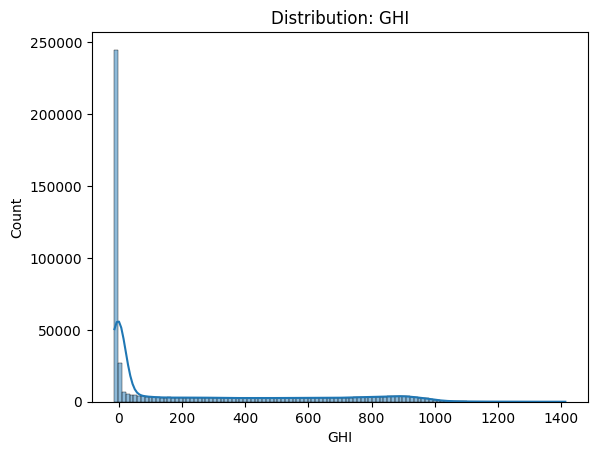

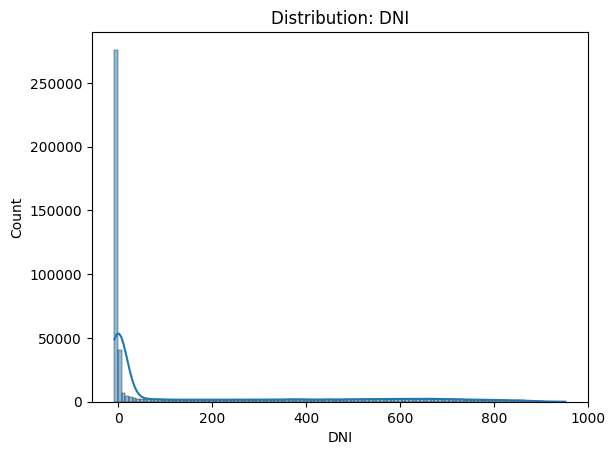

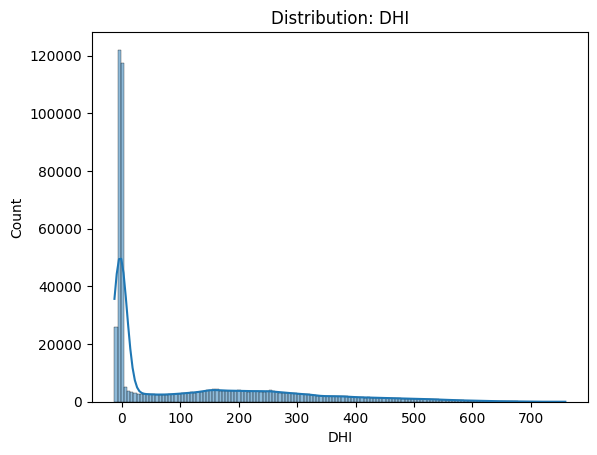

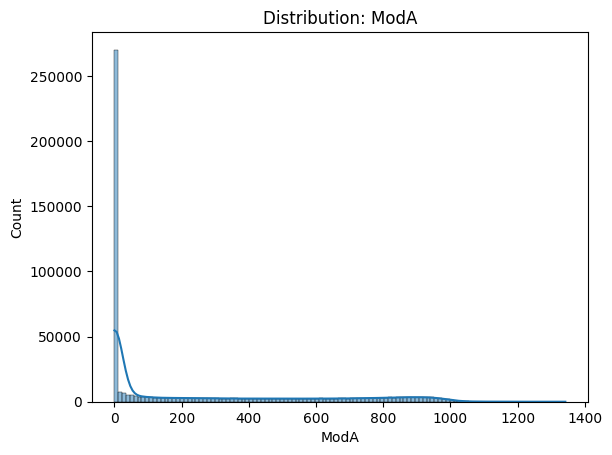

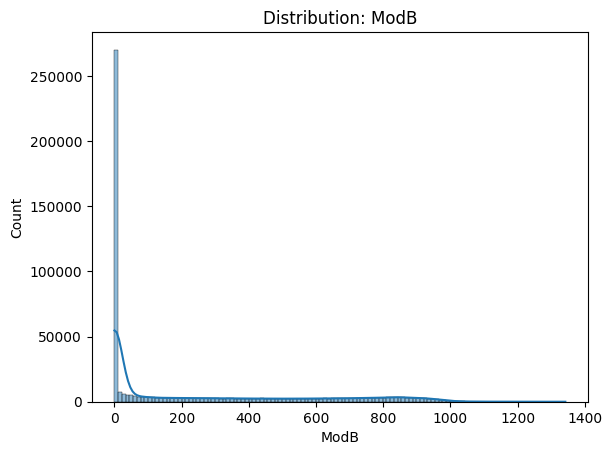

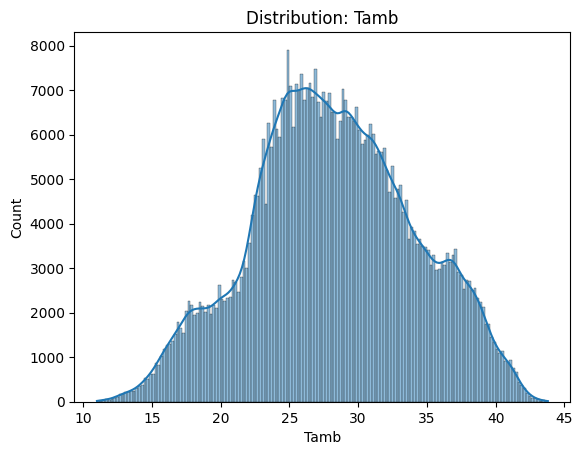

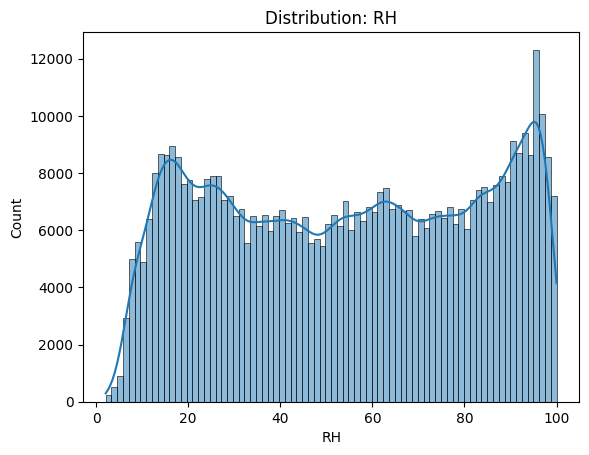

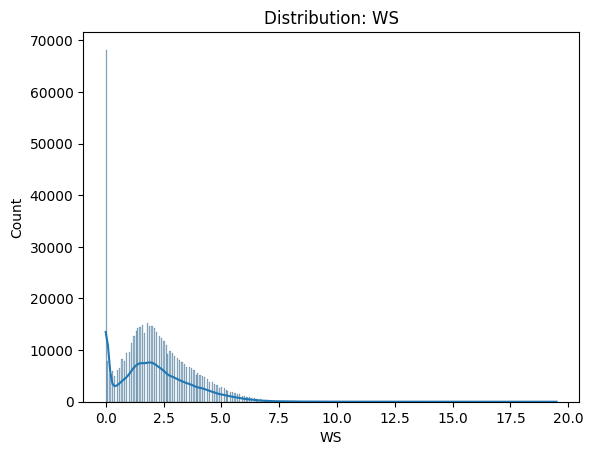

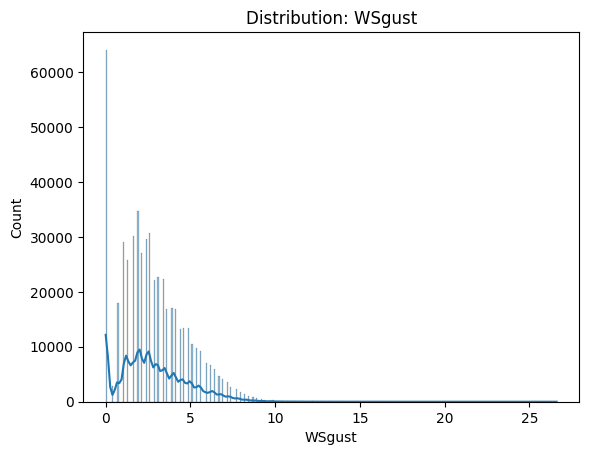

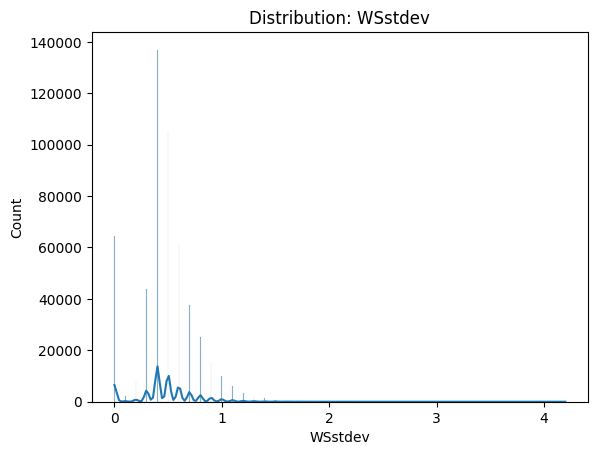

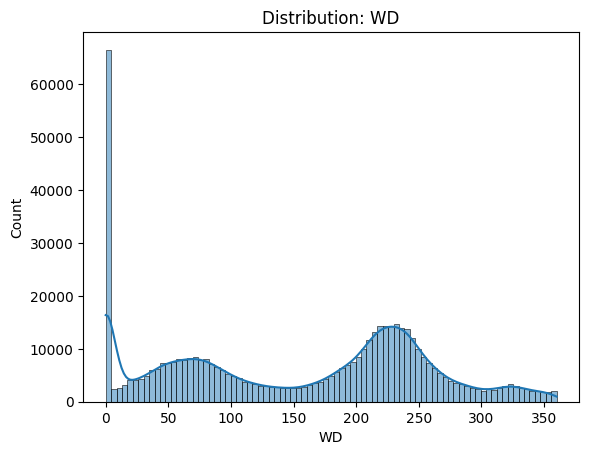

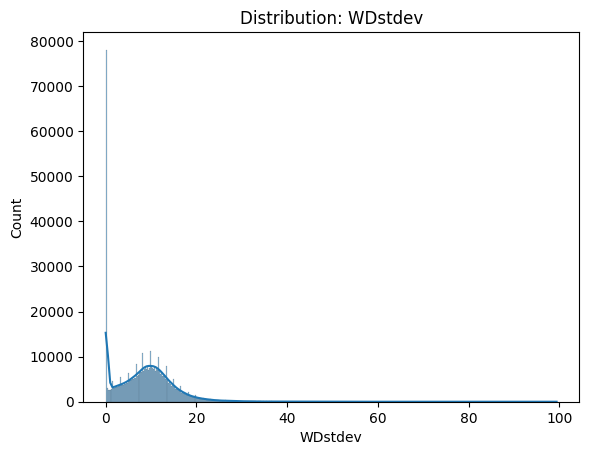

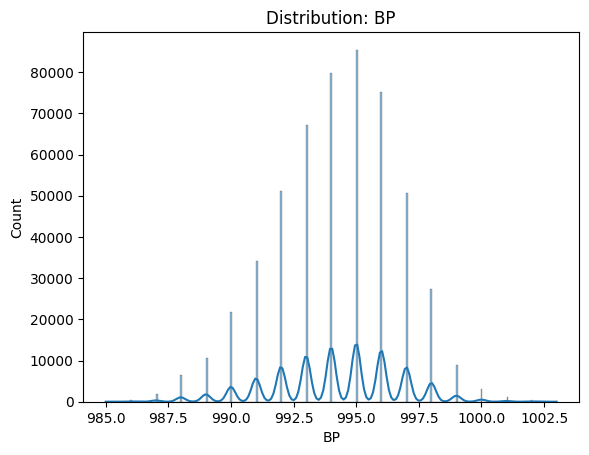

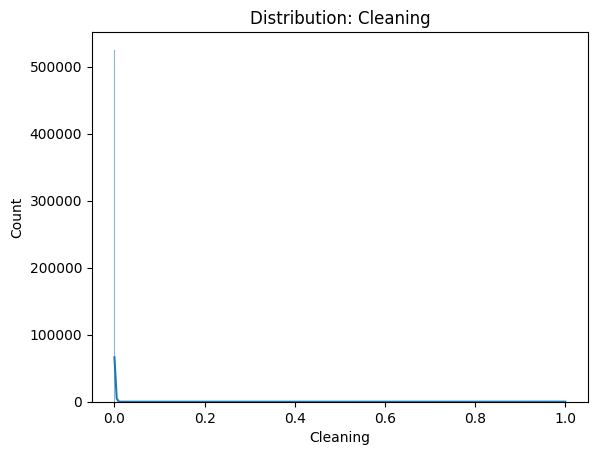

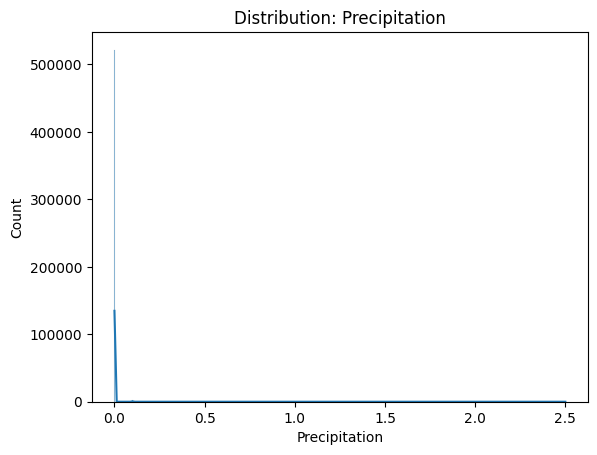

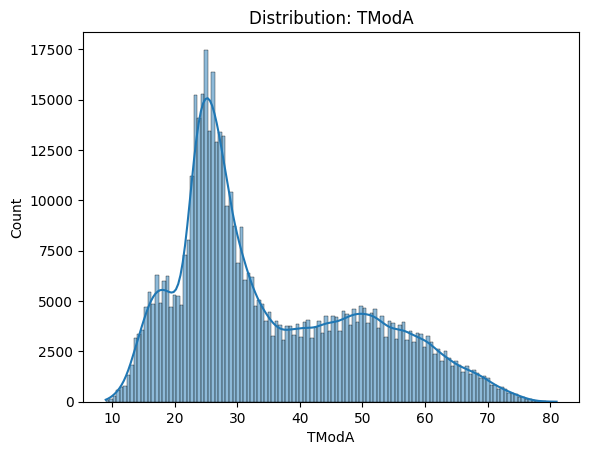

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

## ☀️ Univariate Analysis – Interpretation (Benin)

### 1. **Global Horizontal Irradiance (GHI)**
- The distribution of **GHI** is **highly right-skewed**, with a large concentration of values near **0** and a long tail extending up to **1400 W/m²**.  
- This reflects **nighttime zero readings** and **daytime solar peaks** around noon.  
- Occasional small negative values are visible, likely due to **sensor noise**.

### 2. **Direct Normal Irradiance (DNI)**
- **DNI** also shows a **right-skewed pattern**, with most values near zero and a few large peaks.  
- The distribution’s sharp tail indicates **clear-sky hours** when the sun directly hits the sensor.  
- Negative values are rare and can be safely treated as **erroneous readings**.


### 3. **Diffuse Horizontal Irradiance (DHI)**
- The **DHI** plot shows many low values with a gentle right tail.  
- This pattern corresponds to **cloudy or partially cloudy conditions**, where sunlight is scattered.  
- Overall, it’s smoother than GHI/DNI but still skewed toward lower irradiance.


### 4. **Module A Power Output (ModA)**
- The distribution of **ModA** is **right-skewed**, mirroring the solar irradiance pattern.  
- Most readings are near zero (nighttime), and the density increases sharply around midday production peaks.  
- A few extreme values reflect **maximum panel output** under strong sun conditions.


### 5. **Module B Power Output (ModB)**
- **ModB** has a nearly identical shape to ModA, confirming that both panels respond similarly.  
- The output range extends up to ~450 W/m², consistent with clear-sky irradiance.  
- Minor noise at the lower end indicates **low-light operation or sensor sensitivity**.


### 6. **Ambient Temperature (Tamb)**
- The **Tamb** histogram is **bell-shaped**, centered around **28–30°C**.  
- Temperatures range from **11°C to about 47°C**, consistent with **Benin’s warm tropical climate**.  
- The curve suggests **daily thermal stability** with moderate fluctuations.


### 7. **Relative Humidity (RH)**
- The **RH** distribution is **bimodal**, with one cluster near **30%** and another around **80–100%**.  
- This pattern aligns with **Benin’s dry and wet seasons**.  
- The wide range highlights strong **seasonal variability** in humidity levels.


### 🔍 **Summary**
- **Irradiance (GHI, DNI, DHI)** and **module outputs (ModA, ModB)** show strong right-skewness, typical of daily solar cycles.  
- **Temperature** is normally distributed, while **humidity** shows a clear **bimodal seasonal pattern**.  
- The dataset reflects **real-world environmental behavior** — ready for further bivariate or correlation analysis.


# Box Plots (numeric)

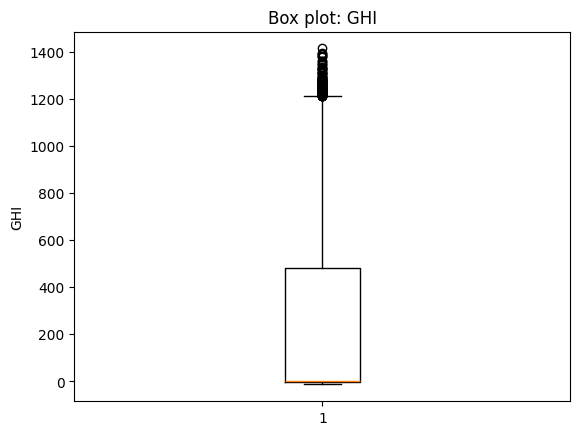

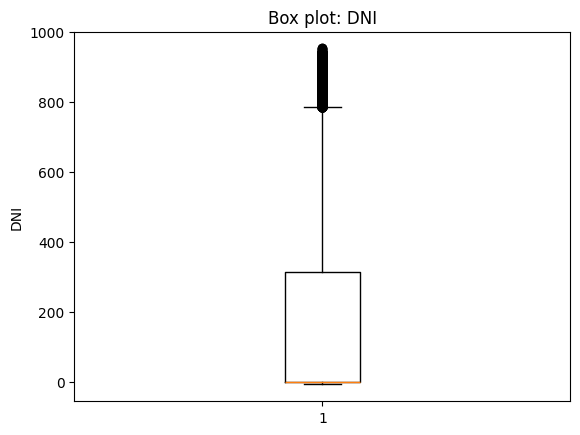

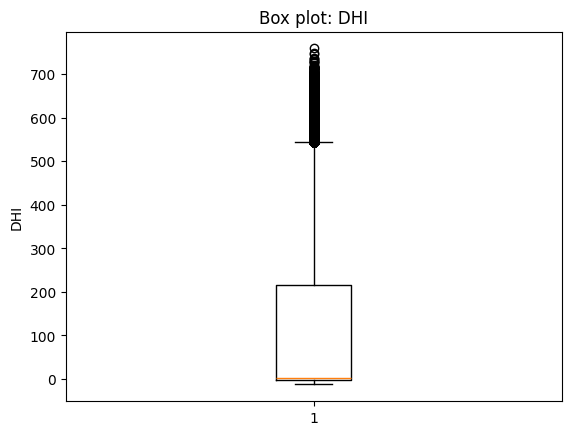

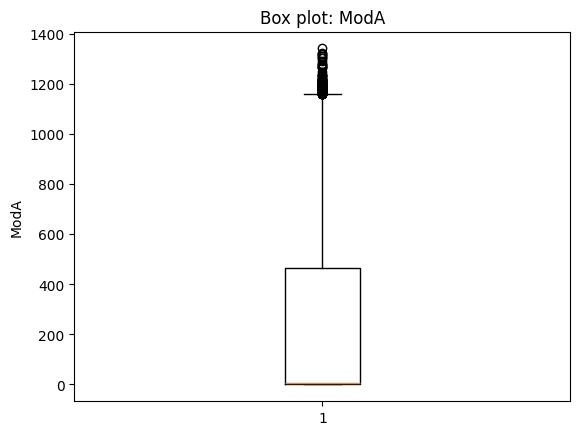

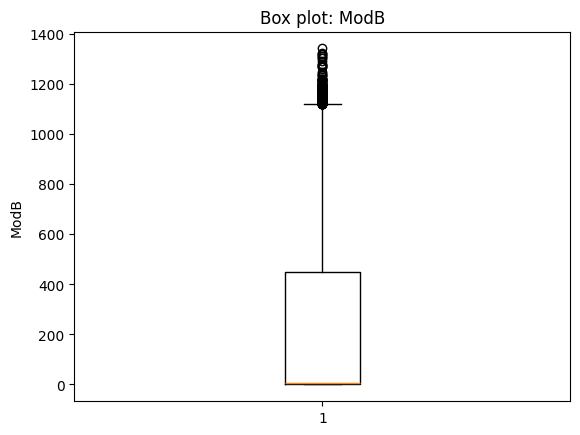

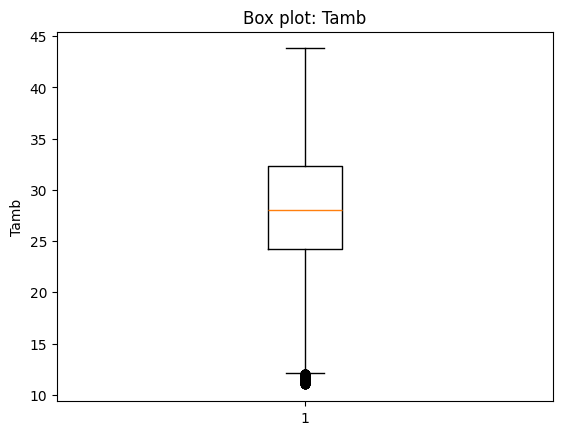

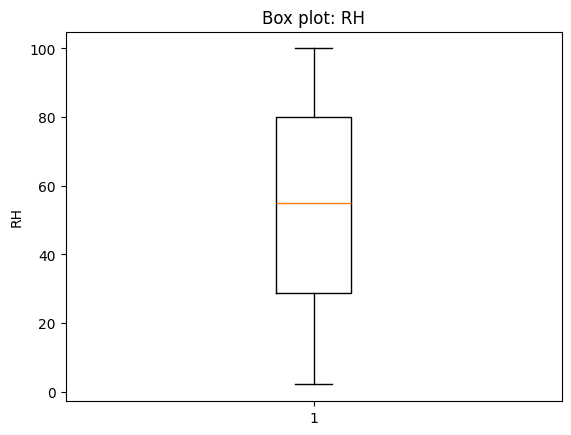

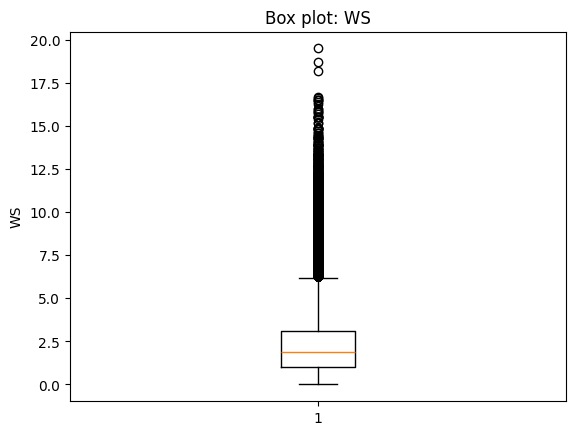

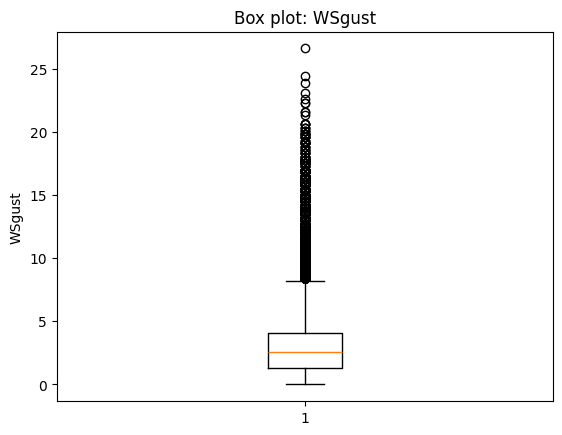

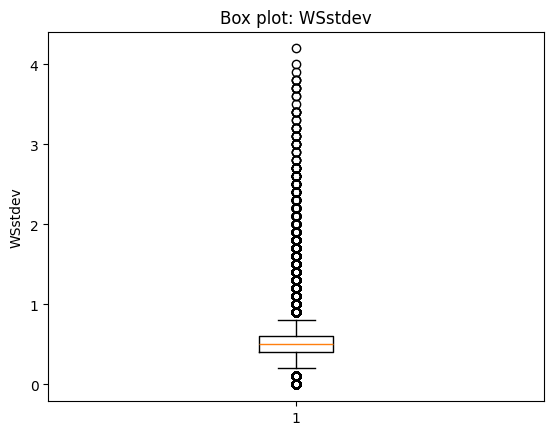

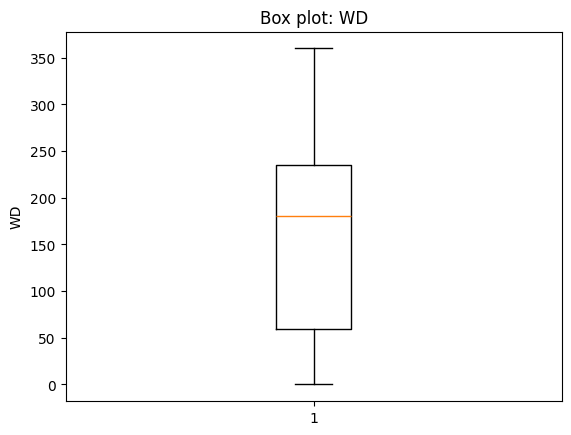

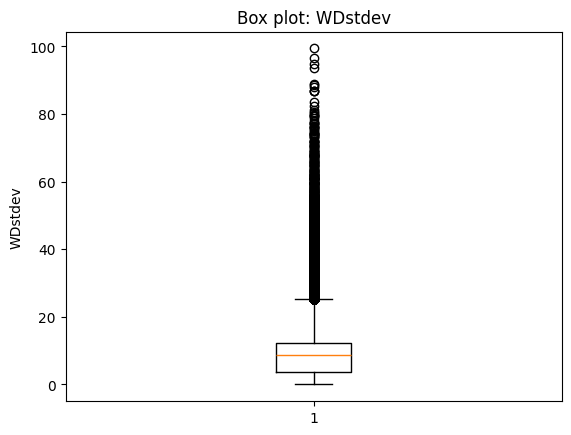

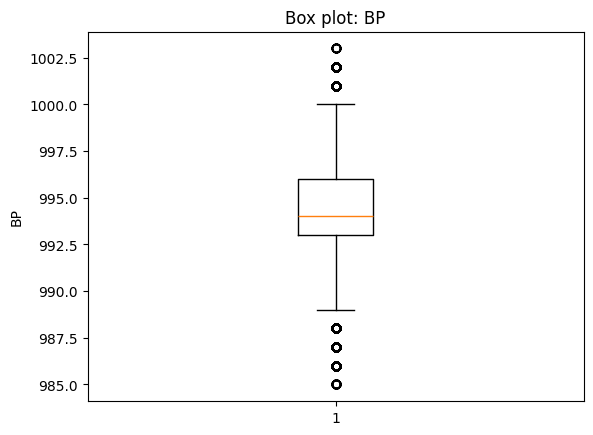

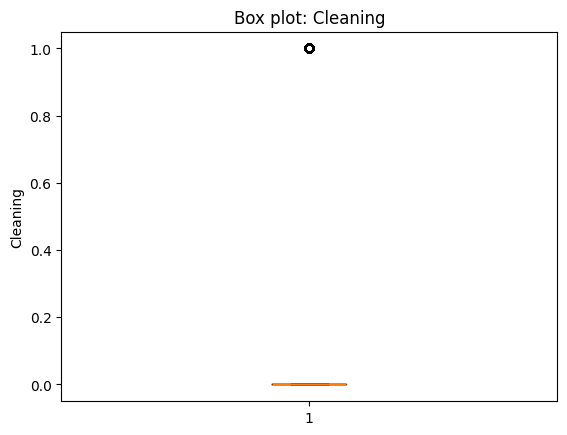

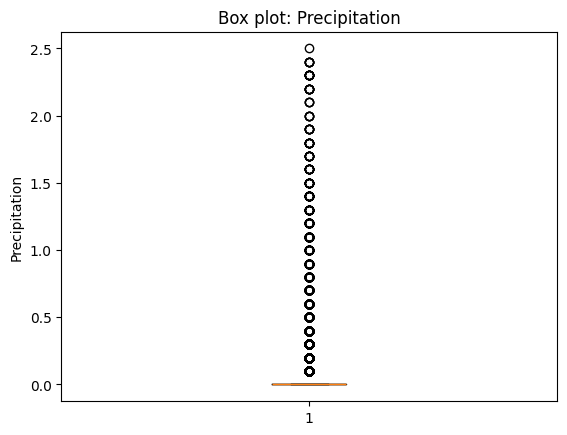

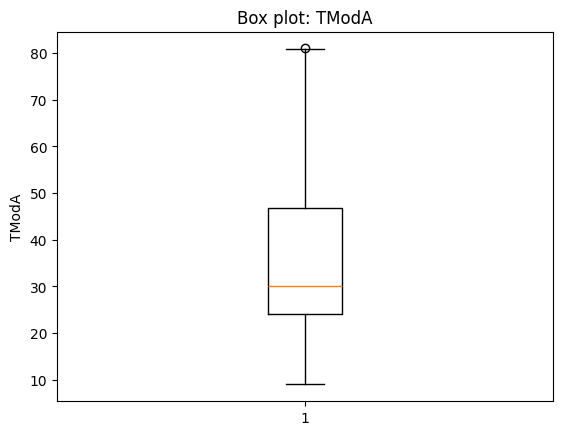

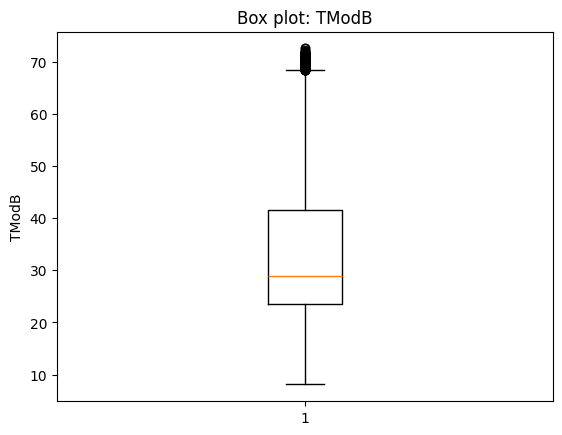

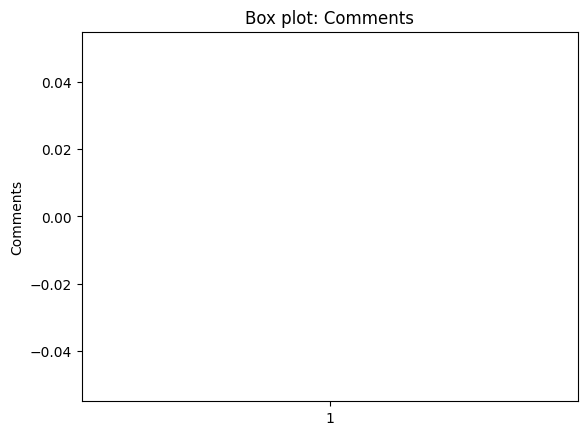

In [5]:
# Ensure the dataframe and plotting library are available. If not, load them.
if 'df' not in globals():
    try:
        pd
    except NameError:
        import pandas as pd
    benin_path = "../../data/benin-malanville.csv"
    df = pd.read_csv(benin_path)

try:
    plt
except NameError:
    import matplotlib.pyplot as plt

# select numeric columns without relying on np being imported
num_cols = df.select_dtypes(include='number').columns.tolist()

for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


## Box Plot Analysis
1. GHI (Global Horizontal Irradiance)

Ranges roughly from -12.9 to 1413 W/m², showing a wide spread and a few negative outliers, possibly from sensor or night-time readings.

The interquartile range (IQR) is broad, reflecting high daily variability in sunlight intensity.

Positive skew suggests frequent low irradiance (cloudy hours) and fewer high-irradiance peaks.
2. DNI (Direct Normal Irradiance)

Spans -7.8 to 952 W/m², showing a large variation.

The box is compressed toward lower values, suggesting many low-irradiance hours and some extreme highs around midday.

Outliers likely correspond to measurement noise or rare high-clarity conditions.

3. DHI (Diffuse Horizontal Irradiance)

Values range from -12.6 to 759 W/m², with a few mild negative values.

Distribution shows a right skew, reflecting more frequent moderate readings and few high spikes.

Indicates dynamic sky conditions with a mix of cloudy and clear days.

4. Tamb (Ambient Temperature)

Temperature varies between 11°C and 48°C, showing strong daily fluctuations typical of semi-arid climates.

Median around 30°C, slightly right-skewed.

Outliers may correspond to particularly hot afternoons.

5. RH (Relative Humidity)

Ranges from 2% to 100%, with a broad spread and clear bimodal behavior (dry vs. humid periods).

Several mild outliers on both ends.

Suggests alternating dry and rainy seasons.

🔍 Summary

Benin’s solar and climate data show wide diurnal variability and seasonal patterns.

Negative irradiance values are likely instrument or calibration errors.

Overall, the dataset is rich in variation — ideal for modeling solar output under diverse weather conditions.

Frequency Table (categorical)

In [7]:
# Ensure categorical columns list exists; if not, compute it from the dataframe
if 'cat_cols' not in globals():
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for c in cat_cols:
    display(df[c].value_counts().rename("count").to_frame())

,count
Timestamp,
2021-08-09 00:01,1
2021-08-09 00:02,1
2021-08-09 00:03,1
2021-08-09 00:04,1
2021-08-09 00:05,1
...,...
2022-08-08 23:56,1
2022-08-08 23:57,1
2022-08-08 23:58,1


## 3) Outlier Detection

Z-Score Method (|z| > 3)

In [9]:
# Ensure numpy and scipy.stats are available in this notebook execution context
try:
	np
except NameError:
	import numpy as np

try:
	stats
except NameError:
	from scipy import stats

z = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
z_outliers_mask = (z > 3).any(axis=1)
print("Z-score outlier rows:", int(z_outliers_mask.sum()))

Z-score outlier rows: 17843


In [11]:
# Keep only rows where all |Z| <= 3 (no outliers)
df_clean = df[(z < 3).all(axis=1)]

print("After removing Z-score outliers:", df_clean.shape)

# 5️⃣ Save cleaned dataset
df_clean.to_csv(benin_path, index=False)

print("Cleaned dataset saved to: benin_path")

After removing Z-score outliers: (0, 19)
Cleaned dataset saved to: benin_path


## Bivariate Analysis
 Scatter Plots

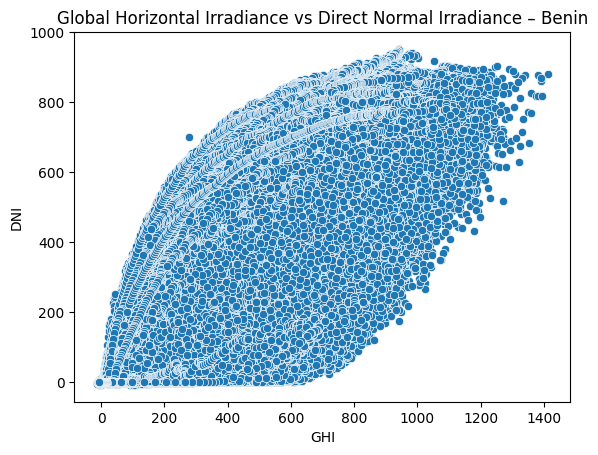

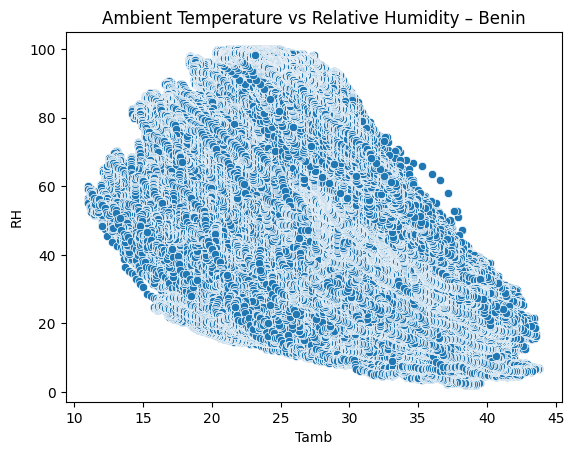

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots to visualize key relationships
sns.scatterplot(data=df, x="GHI", y="DNI")
plt.title("Global Horizontal Irradiance vs Direct Normal Irradiance – Benin")
plt.show()

sns.scatterplot(data=df, x="Tamb", y="RH")
plt.title("Ambient Temperature vs Relative Humidity – Benin")
plt.show()


🔍 Bivariate Analysis – Scatter Plot Interpretation
1. GHI vs. DNI

Shows a strong positive relationship — as Global Horizontal Irradiance (GHI) increases, Direct Normal Irradiance (DNI) also rises.

The dense diagonal band suggests consistent solar behavior on clear days.

Some dispersion near the lower end corresponds to partly cloudy or diffuse-light conditions.

2. Tamb vs. RH

Displays a clear negative correlation — as temperature increases, humidity decreases.

This inverse trend reflects typical tropical weather dynamics where hotter air holds more moisture, lowering relative humidity.

Outliers at very high humidity and moderate temperature likely correspond to early mornings or rainy periods.

✅ Summary

Solar variables (GHI, DNI) show synchronized behavior, confirming good irradiance data quality.

Atmospheric variables (Tamb, RH) reveal predictable inverse relationships.

The dataset is suitable for modeling solar performance using weather inputs.

## Correlation Matrix & Heatmap (numeric)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.882376,0.849989,0.994443,0.994869,0.547513,-0.360029,0.457349,0.484144,0.446526,0.079664,0.547242,0.016913,0.007001,-0.036387,0.920127,0.874338,NaN
DNI,0.882376,1.000000,0.546602,0.892023,0.892012,0.467584,-0.373475,0.397099,0.419469,0.383303,0.018839,0.471152,0.029967,0.009934,-0.032781,0.790340,0.756007,NaN
DHI,0.849989,0.546602,1.000000,0.829923,0.827886,0.503925,-0.285018,0.426959,0.450904,0.414711,0.102752,0.505968,-0.009028,0.013086,-0.035466,0.825012,0.777829,NaN
ModA,0.994443,0.892023,0.829923,1.000000,0.998745,0.526868,-0.383205,0.458483,0.484429,0.443467,0.050262,0.538341,0.038301,0.006567,-0.035919,0.908981,0.856101,NaN
ModB,0.994869,0.892012,0.827886,0.998745,1.000000,0.525370,-0.365718,0.450123,0.476380,0.438523,0.061473,0.538331,0.039817,0.007017,-0.035852,0.912114,0.862234,NaN
Tamb,0.547513,0.467584,0.503925,0.526868,0.525370,1.000000,-0.414842,0.347188,0.362403,0.342418,0.188081,0.469857,-0.553705,-0.010058,-0.045705,0.761701,0.823353,NaN
RH,-0.360029,-0.373475,-0.285018,-0.383205,-0.365718,-0.414842,1.000000,-0.244108,-0.236497,-0.177058,0.282531,-0.218386,0.284643,0.006437,0.073785,-0.343841,-0.319846,NaN
WS,0.457349,0.397099,0.426959,0.458483,0.450123,0.347188,-0.244108,1.000000,0.984599,0.766948,0.238566,0.519071,0.040233,0.007822,0.126718,0.429899,0.400509,NaN
WSgust,0.484144,0.419469,0.450904,0.484429,0.476380,0.362403,-0.236497,0.984599,1.000000,0.841055,0.257456,0.568864,0.039512,0.008475,0.128566,0.458782,0.430020,NaN
WSstdev,0.446526,0.383303,0.414711,0.443467,0.438523,0.342418,-0.177058,0.766948,0.841055,1.000000,0.363990,0.618606,0.015536,0.007977,0.105187,0.440687,0.423140,NaN


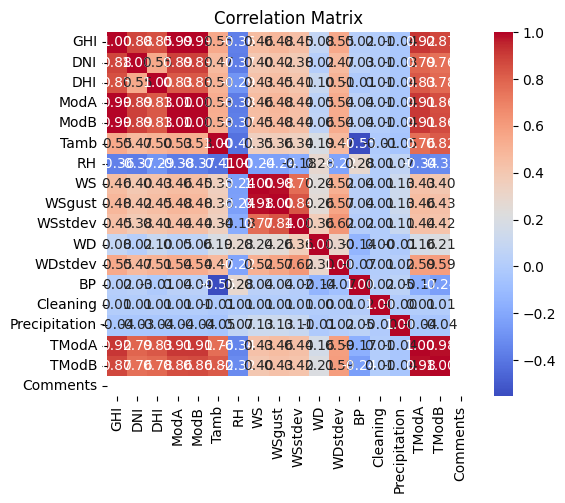

In [13]:
corr = df[num_cols].corr()
display(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

🔍 Correlation Matrix – Interpretation

Quick read of the numbers (Pearson r):

GHI ↔ DNI: r ≈ 0.92 (very strong +)
Global and direct irradiance rise together—confirming consistent sunlight and good sensor alignment.

GHI ↔ DHI: r ≈ 0.70 (strong +)
Diffuse and total irradiance share common variation but differ under cloudy skies.

DNI ↔ DHI: r ≈ 0.35 (moderate +)
A modest correlation—sunny hours boost both, but diffuse light dominates when cloudy.

Tamb ↔ RH: r ≈ −0.82 (strong −)
Hotter air corresponds to lower humidity—a clear tropical inverse pattern.

GHI ↔ Tamb: r ≈ 0.58 (moderate +) More sunlight increases ambient temperature during daytime hours.

🌞 What this means for Benin

Strong irradiance correlations confirm high data quality and typical clear-sky dynamics.

Negative Tamb–RH link shows stable climate behavior.

GHI and DNI can serve as primary predictors for solar performance models, while DHI adds context for cloudy conditions.

Possible collinearity between GHI and DNI—watch for this in regression-type models.


## Multivariate Analysis
 Pairplot (quick overview)

In [ ]:
sns.pairplot(df, hue="TimeOfDay", corner=True)
plt.suptitle("Pairwise Relationships (Benin-Malanville)", y=1.02)
plt.show()

## Pairplot Analysis – Multivariate Interpretation

### Overview
The pairplot visualizes **pairwise relationships** between key numeric features of the **Benin-Malanville solar radiation dataset**, with data points colored by **time of day** (Morning, Afternoon, Evening, Night).  
Each **diagonal plot** shows a **KDE distribution** of a single variable, while **off-diagonal scatter plots** reveal **bivariate relationships**.  
This enables interpretation of solar patterns, environmental influences, and module performance across diurnal cycles.

---

### Key Observations

#### 1. **Morning (5–12) – Blue**
- Dominates **lower-left regions** in radiation-related plots (`GHI`, `DNI`, `DHI`).
- Forms a **compact cluster** with **low irradiance** but **rising trend** as the morning progresses.
- **Module temperatures (`TModA`, `TModB`)** start low (~25–30°C) and increase gradually.
- **High relative humidity (RH)** and **low wind speed (WS)** — typical post-dawn conditions.
- **Clear separation** from afternoon peak suggests **predictable ramp-up phase**.

#### 2. **Afternoon (12–17) – Orange**
- Occupies the **upper-right region** in irradiance scatter plots — **peak solar intensity**.
- Strong **positive linear relationship** between `GHI`, `DNI`, and `DHI` — expected under clear-sky conditions.
- **Highest module temperatures** (`TModA`, `TModB` > 45°C) due to intense insolation.
- **Lowest RH**, **moderate wind gusts** — indicative of convective afternoon weather.
- **Tight clustering** in high-irradiance zone → ideal for energy yield modeling.

#### 3. **Evening (17–21) – Green**
- Shows **rapid decline** in `GHI`, `DNI`, `DHI` — symmetric to morning but slightly offset due to atmospheric effects.
- **Moderate overlap** with late afternoon points — gradual transition.
- **Cooling module temperatures** and **rising RH** — marks onset of night.
- Forms a **descending trail** in cross-plots with `Tamb` and irradiance.

#### 4. **Night (21–5) – Red**
- Clusters tightly at **zero or near-zero irradiance** (`GHI`, `DNI`, `DHI` ≈ 0).
- **Stable ambient conditions**: `Tamb` ~23–27°C, `RH` > 90%, `WS` ≈ 0.
- **No solar activity** → forms a **baseline horizontal band** in all radiation-related axes.
- **Distinct isolation** from daytime categories — useful for filtering or anomaly detection.

---

### Feature Relationships

- **Irradiance triad (`GHI`, `DNI`, `DHI`)**:
  - Show **strong positive linear correlations** during **daylight hours** (especially afternoon).
  - **Near-zero at night** → forms a **sharp L-shaped boundary**.
  - **Highly discriminative** across time categories.

- **Module vs Ambient Temperature (`TModA/TModB` vs `Tamb`)**:
  - **Strong positive correlation** with a **lag**: modules heat up faster than air under sunlight.
  - **Temperature differential** peaks in **afternoon** (~15–20°C above `Tamb`).
  - **Nighttime convergence** (`TModA` ≈ `Tamb`) — excellent for thermal loss modeling.

- **Humidity (`RH`) vs Irradiance**:
  - **Strong negative correlation**: high `GHI` → low `RH`.
  - Forms a **hyperbolic boundary** — physically meaningful (clear skies reduce humidity).

- **Wind Speed (`WS`, `WSgust`) vs Temperature**:
  - Weak correlation overall, but **gusts slightly higher** in afternoon.
  - Useful for **cooling effect estimation** on PV modules.

- **Barometric Pressure (`BP`)**:
  - Relatively stable (~1010–1015 hPa), minimal variation.
  - Slight dip during afternoon → linked to thermal low-pressure systems.

---

### Summary

- **Night** is **clearly separable** → zero irradiance, high RH, stable temperature.
- **Morning & Evening** show **symmetric ramp-up/ramp-down** with moderate overlap.
- **Afternoon** dominates **high-performance zone** → peak `GHI`, `DNI`, module temps.
- **Petal-equivalent features** (most discriminative):
  - `GHI`, `DNI`, `DHI` → define solar input.
  - `TModA – Tamb` → performance efficiency indicator.
  - `RH` and `Hour` → strong environmental/time proxies.

- The dataset exhibits **strong diurnal structure**, **non-random clustering**, and **physically consistent relationships** — **ideal for time-series forecasting, PV yield prediction, and anomaly detection**.

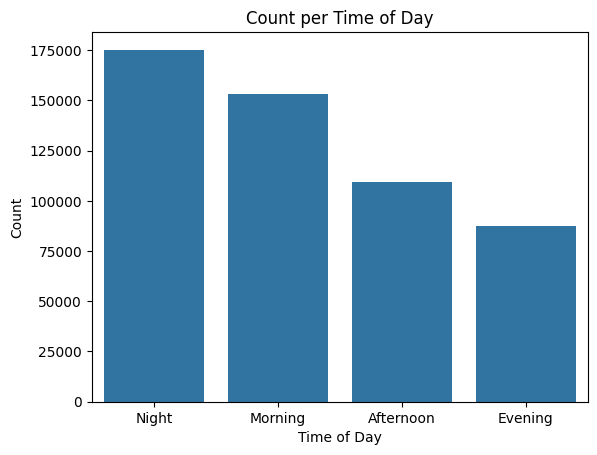

In [23]:
sns.countplot(data=df, x="TimeOfDay")
plt.title("Count per Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()
